In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("./data/Issi.csv", parse_dates=["Date"])
df.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-02 15:00:00,124.72,125.34,124.35,124.72,799587584.0
1,2012-01-03 15:00:00,126.56,126.58,124.69,126.56,3809.0
2,2012-01-04 15:00:00,128.43,128.96,126.57,128.43,3610.0
3,2012-01-05 15:00:00,128.76,129.48,128.27,128.76,3321.0
4,2012-01-06 15:00:00,127.51,128.83,126.82,127.51,2054.0


In [3]:
date = df["Date"].dt
df["Day"] = date.day
df["weekday"] = date.weekday
df["weekend"] = (df.weekday >= 5).astype(int)
df["Month"] = date.month

In [4]:
df.head(15)

,Date,Open,High,Low,Close,Volume,Day,weekday,weekend,Month
0,2012-01-02 15:00:00,124.72,125.34,124.35,124.72,799587584.0,2,0,0,1
1,2012-01-03 15:00:00,126.56,126.58,124.69,126.56,3809.0,3,1,0,1
2,2012-01-04 15:00:00,128.43,128.96,126.57,128.43,3610.0,4,2,0,1
3,2012-01-05 15:00:00,128.76,129.48,128.27,128.76,3321.0,5,3,0,1
4,2012-01-06 15:00:00,127.51,128.83,126.82,127.51,2054.0,6,4,0,1
5,2012-01-09 15:00:00,127.98,128.04,126.86,127.98,2327.0,9,0,0,1
6,2012-01-10 15:00:00,130.01,130.04,127.86,130.01,596710464.0,10,1,0,1
7,2012-01-11 15:00:00,128.56,130.45,128.26,128.56,911606208.0,11,2,0,1
8,2012-01-12 15:00:00,128.59,129.12,127.99,128.59,2807.0,12,3,0,1
9,2012-01-13 15:00:00,129.67,129.89,128.56,129.67,511.0,13,4,0,1


In [5]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.set_index("Date")
df.head()

,Open,High,Low,Close,Volume,Day,weekday,weekend,Month
Date,,,,,,,,,
2012-01-02 15:00:00,124.72,125.34,124.35,124.72,799587584.0,2,0,0,1
2012-01-03 15:00:00,126.56,126.58,124.69,126.56,3809.0,3,1,0,1
2012-01-04 15:00:00,128.43,128.96,126.57,128.43,3610.0,4,2,0,1
2012-01-05 15:00:00,128.76,129.48,128.27,128.76,3321.0,5,3,0,1
2012-01-06 15:00:00,127.51,128.83,126.82,127.51,2054.0,6,4,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2532 entries, 2012-01-02 15:00:00 to 2022-07-01 15:00:00
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     2532 non-null   float64
 1   High     2532 non-null   float64
 2   Low      2532 non-null   float64
 3   Close    2532 non-null   float64
 4   Volume   2389 non-null   float64
 5   Day      2532 non-null   int64  
 6   weekday  2532 non-null   int64  
 7   weekend  2532 non-null   int32  
 8   Month    2532 non-null   int64  
dtypes: float64(5), int32(1), int64(3)
memory usage: 187.9 KB


In [7]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Volume     143
Day          0
weekday      0
weekend      0
Month        0
dtype: int64

In [8]:
df.describe()

,Open,High,Low,Close,Volume,Day,weekday,weekend,Month
count,2532.000000,2532.000000,2532.000000,2532.00000,2.389000e+03,2532.000000,2532.000000,2532.0,2532.000000
mean,167.223791,168.106023,166.215821,167.18658,9.453172e+08,15.738942,1.992496,0.0,6.378752
std,18.881057,18.827130,18.897953,18.83818,1.661545e+09,8.708104,1.411537,0.0,3.454381
min,115.950000,120.450000,114.410000,115.95000,0.000000e+00,1.000000,0.000000,0.0,1.000000
25%,150.602500,151.585000,149.480000,150.55250,0.000000e+00,8.000000,1.000000,0.0,3.000000
50%,170.975000,171.955000,169.995000,170.99500,0.000000e+00,16.000000,2.000000,0.0,6.000000
75%,183.252500,184.095000,182.357500,183.19500,1.769715e+09,23.000000,3.000000,0.0,9.000000
max,209.750000,210.320000,208.750000,209.31000,9.467919e+09,31.000000,4.000000,0.0,12.000000


In [9]:
df.drop(columns="Volume", inplace=True)

In [10]:
df.describe()

,Open,High,Low,Close,Day,weekday,weekend,Month
count,2532.000000,2532.000000,2532.000000,2532.00000,2532.000000,2532.000000,2532.0,2532.000000
mean,167.223791,168.106023,166.215821,167.18658,15.738942,1.992496,0.0,6.378752
std,18.881057,18.827130,18.897953,18.83818,8.708104,1.411537,0.0,3.454381
min,115.950000,120.450000,114.410000,115.95000,1.000000,0.000000,0.0,1.000000
25%,150.602500,151.585000,149.480000,150.55250,8.000000,1.000000,0.0,3.000000
50%,170.975000,171.955000,169.995000,170.99500,16.000000,2.000000,0.0,6.000000
75%,183.252500,184.095000,182.357500,183.19500,23.000000,3.000000,0.0,9.000000
max,209.750000,210.320000,208.750000,209.31000,31.000000,4.000000,0.0,12.000000


# Plot Analysis

<AxesSubplot: xlabel='Date'>

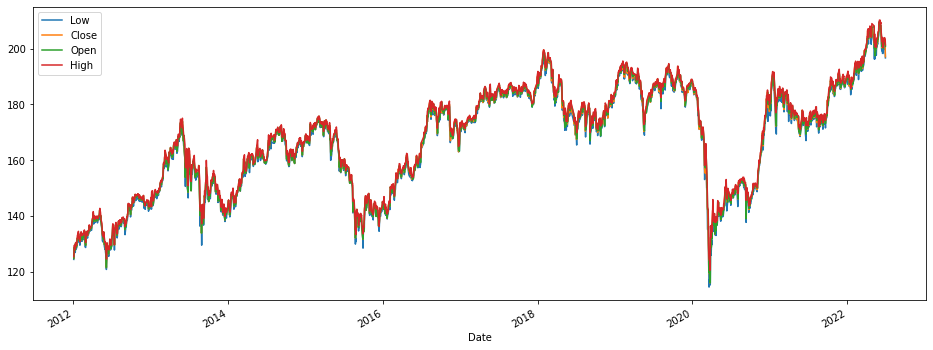

In [11]:
df[["Low", "Close", "Open", "High"]].plot(figsize=(16, 6))

### Terendah ada di 2020 april

(18262.0, 18627.0)

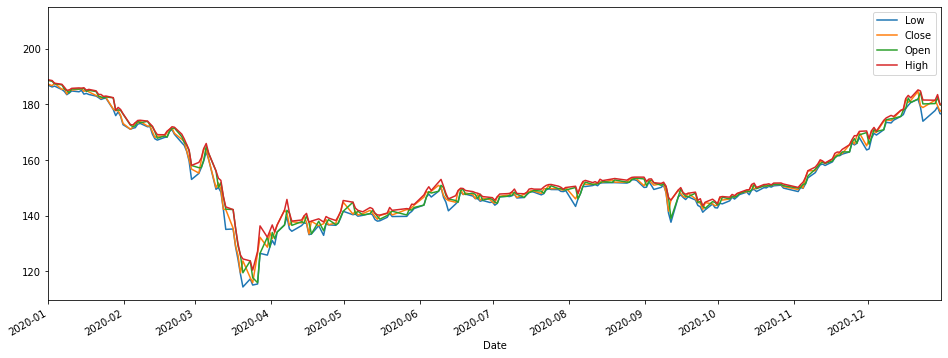

In [12]:
df[["Low", "Close", "Open", "High"]].plot(figsize=(16, 6))
plt.xlim("2020-01-01", "2020-12-31")

### Terendah ada di tahun 2020

In [13]:
df.groupby(df.index.year).mean().T

Date,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Open,137.449876,153.740124,160.666888,156.465205,164.132387,181.627511,181.022083,187.701475,154.540456,180.179016,197.873621
High,138.033320,154.921328,161.389212,157.398320,164.968230,182.269747,181.956250,188.436557,155.734315,181.165656,198.903190
Low,136.518133,152.595062,159.881950,155.656762,163.213004,180.946835,179.921875,186.734508,153.180871,178.940533,196.574741
Close,137.449876,153.743320,160.669336,156.465205,164.150617,181.625738,180.966208,187.608566,154.456183,180.037705,197.798448
Day,15.568465,15.850622,15.385892,15.721311,16.082305,15.523207,15.737500,15.954918,15.510373,15.840164,16.163793
weekday,2.000000,2.020747,1.983402,1.967213,2.028807,1.983122,2.012500,2.004098,1.950207,1.983607,1.974138
weekend,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Month,6.485477,6.510373,6.585062,6.479508,6.563786,6.514768,6.479167,6.573770,6.456432,6.532787,3.474138


<AxesSubplot: xlabel='Date'>

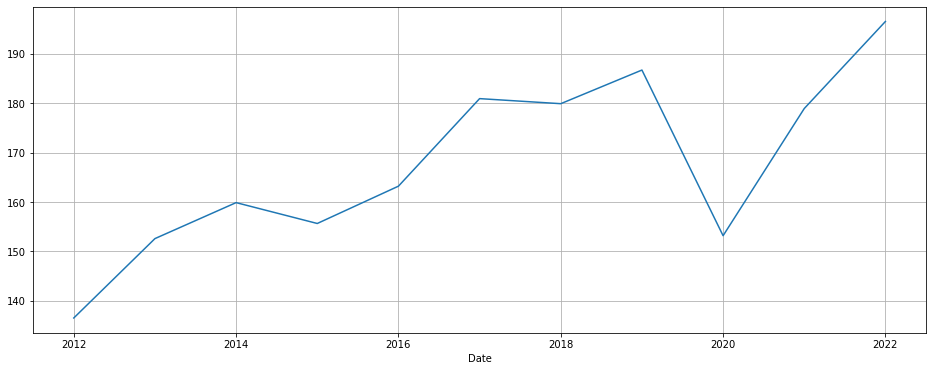

In [14]:
df["Low"].groupby(df.index.year).mean().plot(kind="line", figsize=(16, 6), grid=True)

### Secara rata-rata, ini saham turun ditanggal 3, dan naik tertinggi di tanggal 23

In [15]:
df.groupby(df.index.day).mean()

,Open,High,Low,Close,Day,weekday,weekend,Month
Date,,,,,,,,
1,166.588308,167.517077,165.573231,166.603692,1.0,1.923077,0.0,7.000000
2,166.323023,167.168140,165.333488,166.258140,2.0,1.965116,0.0,6.511628
3,165.630471,166.467294,164.543294,165.511529,3.0,2.035294,0.0,6.517647
4,166.408636,167.368750,165.497386,166.476932,4.0,2.011364,0.0,6.386364
5,167.136220,167.952561,166.119756,167.117439,5.0,2.073171,0.0,6.439024
6,166.927927,167.766585,165.959146,167.057561,6.0,1.987805,0.0,6.341463
7,167.234578,168.183012,166.368916,167.250964,7.0,1.927711,0.0,6.301205
8,168.519412,169.411647,167.562471,168.417765,8.0,2.011765,0.0,6.200000
9,167.721220,168.628293,166.659878,167.527683,9.0,1.914634,0.0,6.341463


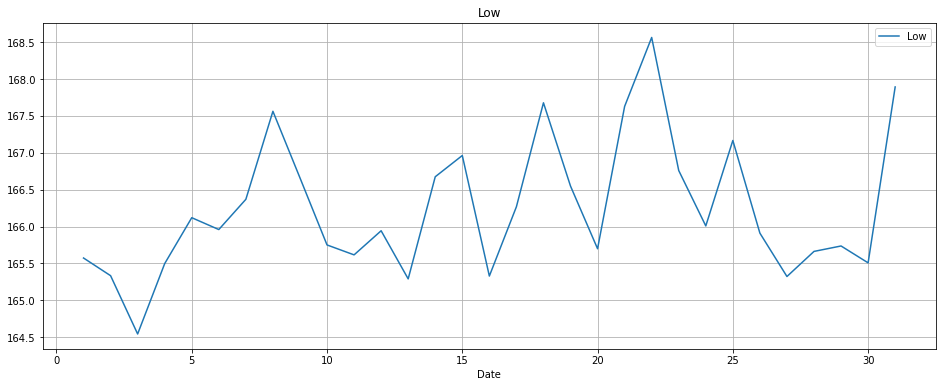

In [16]:
df["Low"].groupby(df.index.day).mean().plot(kind="line", figsize=(16, 6), grid=True, title="Low")
plt.legend(["Low"])

In [17]:
df[df["Day"] == 3].mean()

Open       165.630471
High       166.467294
Low        164.543294
Close      165.511529
Day          3.000000
weekday      2.035294
weekend      0.000000
Month        6.517647
dtype: float64

In [18]:
df[df["Day"] == 23].mean()

Open       167.627586
High       168.596897
Low        166.759195
Close      167.660230
Day         23.000000
weekday      1.908046
weekend      0.000000
Month        6.505747
dtype: float64

### Secara rata-rata, saham ini bakal turun terendah itu di bulan 9 dan naik tertinggi di bulan 4

In [19]:
df.groupby(df.index.month).mean()

,Open,High,Low,Close,Day,weekday,weekend,Month
Date,,,,,,,,
1,168.554361,169.341806,167.495242,168.464053,16.387665,2.035242,0.0,1.0
2,168.457371,169.177934,167.484836,168.378028,14.713615,2.004695,0.0,2.0
3,169.091057,169.963040,167.839163,168.905066,15.801762,2.004405,0.0,3.0
4,169.474182,170.366818,168.479364,169.495818,15.636364,1.913636,0.0,4.0
5,167.459029,168.475243,166.308932,167.371553,16.699029,1.941748,0.0,5.0
6,165.861579,166.928708,164.825407,165.849617,15.880383,2.014354,0.0,6.0
7,165.387548,166.312692,164.533221,165.395240,15.798077,2.000000,0.0,7.0
8,166.445174,167.400249,165.382139,166.455124,16.208955,2.009950,0.0,8.0
9,164.224760,165.101827,163.147260,164.188510,15.495192,1.980769,0.0,9.0


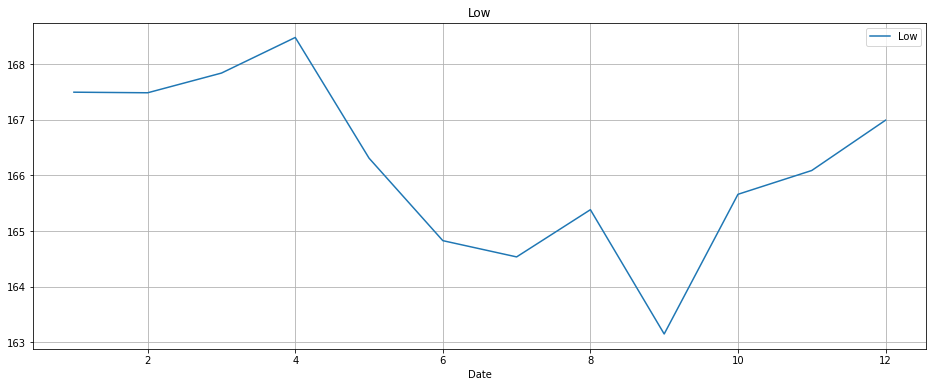

In [20]:
df["Low"].groupby(df.index.month).mean().plot(kind="line", figsize=(16, 6), grid=True, title="Low")
plt.legend(["Low"])

In [21]:
df[df["Month"] == 4].mean()

Open       169.474182
High       170.366818
Low        168.479364
Close      169.495818
Day         15.636364
weekday      1.913636
weekend      0.000000
Month        4.000000
dtype: float64

In [22]:
df[df["Month"] == 9].mean()

Open       164.224760
High       165.101827
Low        163.147260
Close      164.188510
Day         15.495192
weekday      1.980769
weekend      0.000000
Month        9.000000
dtype: float64

In [23]:
df.head()

,Open,High,Low,Close,Day,weekday,weekend,Month
Date,,,,,,,,
2012-01-02 15:00:00,124.72,125.34,124.35,124.72,2,0,0,1
2012-01-03 15:00:00,126.56,126.58,124.69,126.56,3,1,0,1
2012-01-04 15:00:00,128.43,128.96,126.57,128.43,4,2,0,1
2012-01-05 15:00:00,128.76,129.48,128.27,128.76,5,3,0,1
2012-01-06 15:00:00,127.51,128.83,126.82,127.51,6,4,0,1


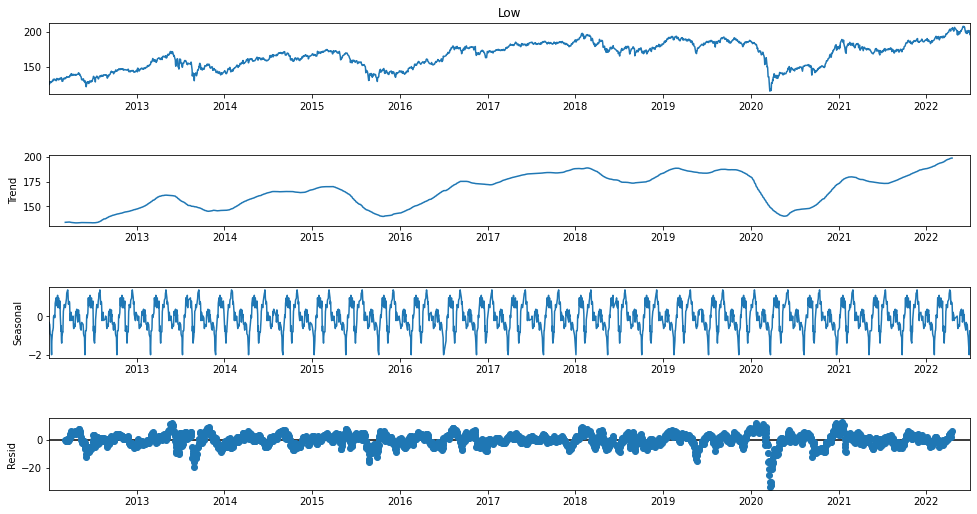

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df["Low"], period=90)
fig = decomp.plot()
fig.set_size_inches(15, 8)

In [25]:
df.dtypes

Open       float64
High       float64
Low        float64
Close      float64
Day          int64
weekday      int64
weekend      int32
Month        int64
dtype: object

In [26]:
df.describe()

,Open,High,Low,Close,Day,weekday,weekend,Month
count,2532.000000,2532.000000,2532.000000,2532.00000,2532.000000,2532.000000,2532.0,2532.000000
mean,167.223791,168.106023,166.215821,167.18658,15.738942,1.992496,0.0,6.378752
std,18.881057,18.827130,18.897953,18.83818,8.708104,1.411537,0.0,3.454381
min,115.950000,120.450000,114.410000,115.95000,1.000000,0.000000,0.0,1.000000
25%,150.602500,151.585000,149.480000,150.55250,8.000000,1.000000,0.0,3.000000
50%,170.975000,171.955000,169.995000,170.99500,16.000000,2.000000,0.0,6.000000
75%,183.252500,184.095000,182.357500,183.19500,23.000000,3.000000,0.0,9.000000
max,209.750000,210.320000,208.750000,209.31000,31.000000,4.000000,0.0,12.000000


ternyata di data ini emg gaada weekend. mksdnya data yang tercatat disini itu data weekdays <br> jadi kalo gt kolom weekend diapus aja

In [27]:
df.drop(columns=["weekend"], inplace=True)

# Feature Engineering

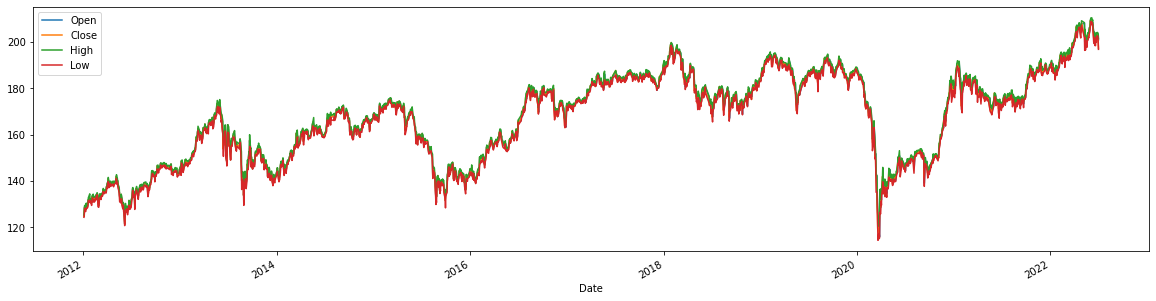

In [28]:
df["Open"].plot(figsize=(20, 5))
df["Close"].plot(figsize=(20, 5))
df["High"].plot(figsize=(20, 5))
df["Low"].plot(figsize=(20, 5))
plt.legend()

### Simple Moving Average

<AxesSubplot: xlabel='Date'>

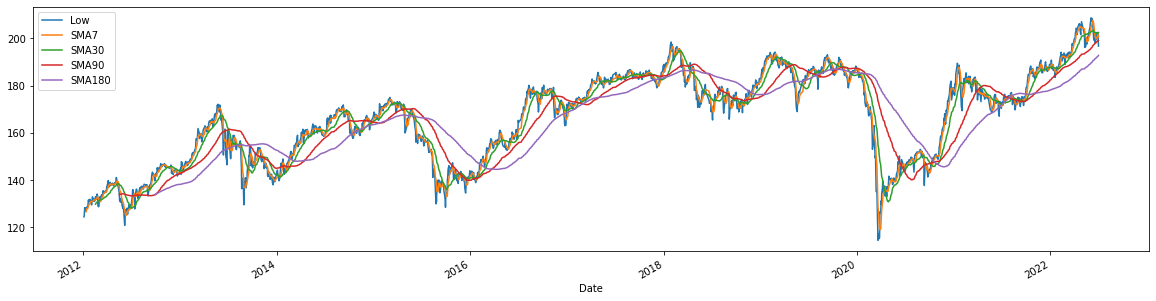

In [29]:
df["SMA7"] = df["Low"].rolling(7).mean()
df["SMA30"] = df["Low"].rolling(30).mean()
df["SMA90"] = df["Low"].rolling(90).mean()
df["SMA180"] = df["Low"].rolling(180).mean()

df[["Low", "SMA7", "SMA30", "SMA90", "SMA180"]].plot(figsize=(20, 5))

(17897.0, 18628.0)

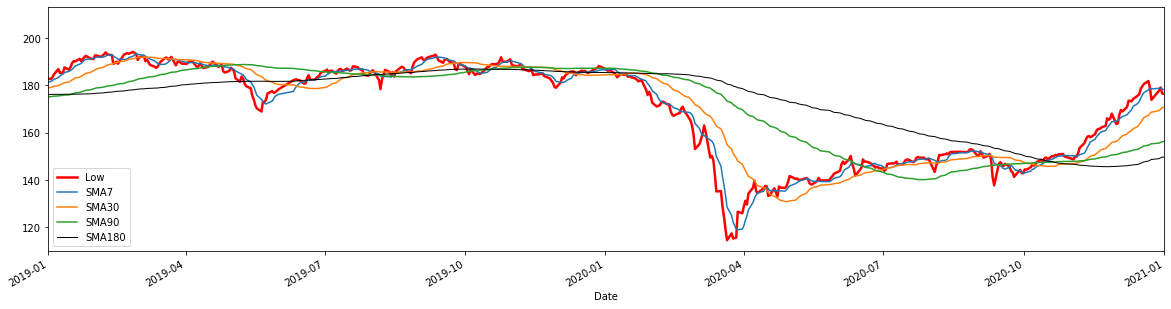

In [30]:
df["Low"].plot(figsize=(20, 5), linewidth=2.5, color="red")
df["SMA7"].plot(figsize=(20, 5))
df["SMA30"].plot(figsize=(20, 5))
df["SMA90"].plot(figsize=(20, 5))
df["SMA180"].plot(figsize=(20, 5), linewidth=1, color="black")
plt.legend()
plt.xlim("2019-01-01", "2021-01-01")

### MACD

<AxesSubplot: xlabel='Date'>

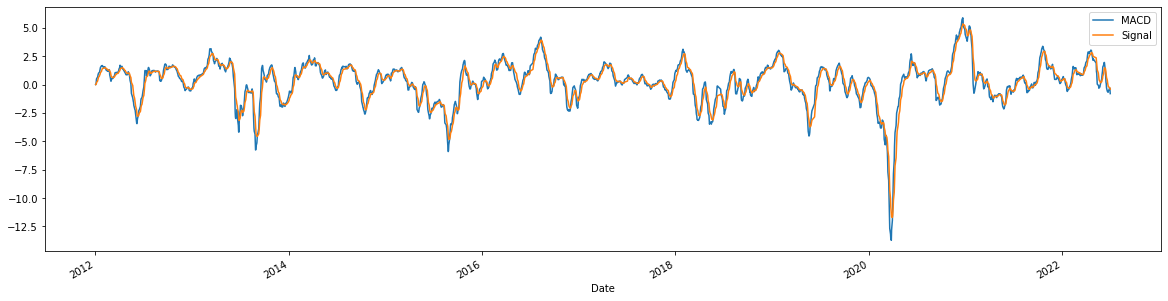

In [31]:
# calculate MACD
df["EMA12"] = df["Low"].ewm(span=12, adjust=False).mean()
df["EMA26"] = df["Low"].ewm(span=26, adjust=False).mean()
df["MACD"] = df["EMA12"] - df["EMA26"]

# calculate signal line
df["Signal"] = df["MACD"].ewm(span=9, adjust=False).mean()

# plot MACD
df[["MACD", "Signal"]].plot(figsize=(20, 5))

<AxesSubplot: xlabel='Date'>

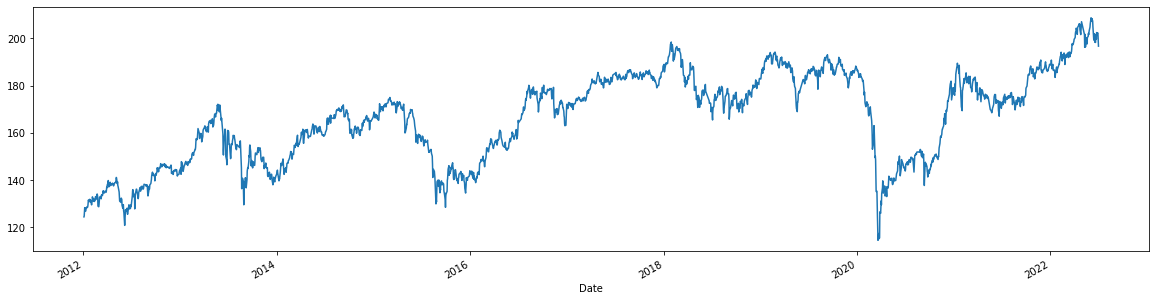

In [32]:
df["Low"].plot(figsize=(20, 5))

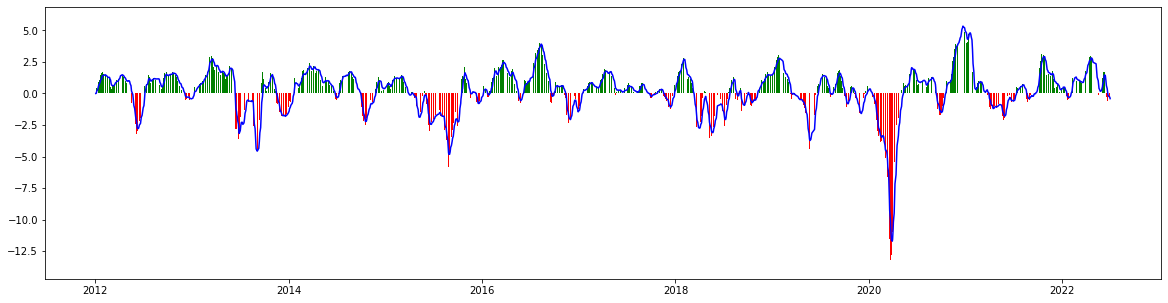

In [33]:
color = np.array(['green']*len(df))
fig, ax = plt.subplots(figsize=(20, 5))
color[df["MACD"] <0 ] = 'red'
plt.bar(df.index, df["MACD"], color=color)
plt.plot(df.index, df["Signal"], color="blue")
plt.show()

# RSI

In [34]:
# calculate RSI
delta = df["Low"].diff(1)
delta = delta.dropna()
up = delta.clip(lower=0)
down = -1*delta.clip(upper=0)
df["up"] = up
df["down"] = down
df["avg_up"] = df["up"].ewm(com=13, adjust=False).mean()
df["avg_down"] = df["down"].ewm(com=13, adjust=False).mean()
df["RS"] = df["avg_up"] / df["avg_down"]
df["RSI"] = 100.0 - (100.0 / (1.0 + df["RS"]))

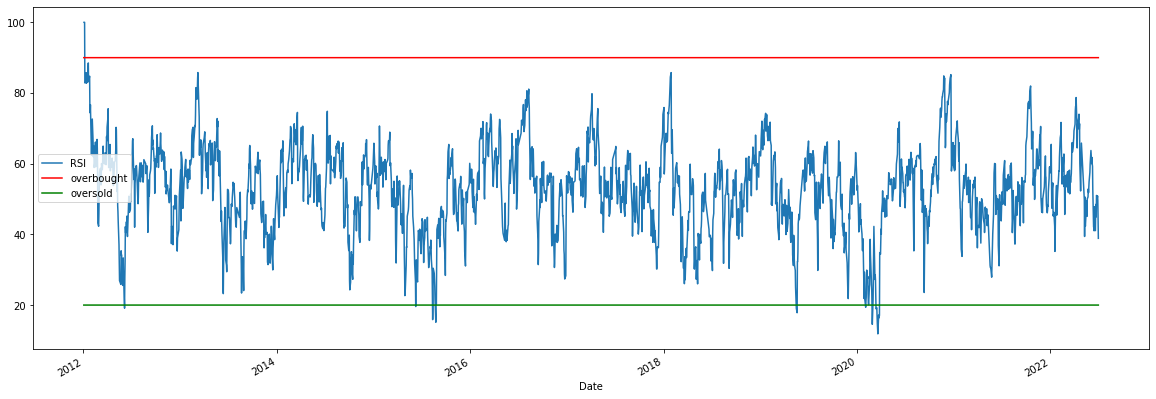

In [43]:
df["RSI"].plot(figsize=(20, 7))
plt.plot(df.index, [90]*len(df), color="red", label="overbought")
plt.plot(df.index, [20]*len(df), color="green", label="oversold")
plt.legend()

In [63]:
df.head()

,Open,High,Low,Close,Day,weekday,Month,SMA7,SMA30,SMA90,...,EMA12,EMA26,MACD,Signal,up,down,avg_up,avg_down,RS,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-02 15:00:00,124.72,125.34,124.35,124.72,2,0,1,NaN,NaN,NaN,...,124.350000,124.350000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03 15:00:00,126.56,126.58,124.69,126.56,3,1,1,NaN,NaN,NaN,...,124.402308,124.375185,0.027123,0.005425,0.34,-0.00,0.340000,-0.000000,-inf,100.000000
2012-01-04 15:00:00,128.43,128.96,126.57,128.43,4,2,1,NaN,NaN,NaN,...,124.735799,124.537764,0.198035,0.043947,1.88,-0.00,0.450000,-0.000000,-inf,100.000000
2012-01-05 15:00:00,128.76,129.48,128.27,128.76,5,3,1,NaN,NaN,NaN,...,125.279522,124.814226,0.465296,0.128216,1.70,-0.00,0.539286,-0.000000,-inf,100.000000
2012-01-06 15:00:00,127.51,128.83,126.82,127.51,6,4,1,NaN,NaN,NaN,...,125.516519,124.962802,0.553717,0.213317,0.00,1.45,0.500765,0.103571,4.834975,82.861967


In [64]:
df.isna().sum()

Open          0
High          0
Low           0
Close         0
Day           0
weekday       0
Month         0
SMA7          6
SMA30        29
SMA90        89
SMA180      179
EMA12         0
EMA26         0
MACD          0
Signal        0
up            1
down          1
avg_up        1
avg_down      1
RS            1
RSI           1
dtype: int64

In [65]:
df.dropna(inplace=True)

In [68]:
df[["SMA7", "SMA30", "SMA90", "SMA180", "MACD", "Signal", "RSI"]] = df[["SMA7", "SMA30", "SMA90", "SMA180", "MACD", "Signal", "RSI"]].shift(-1)

In [69]:
df.head()

,Open,High,Low,Close,Day,weekday,Month,SMA7,SMA30,SMA90,...,EMA12,EMA26,MACD,Signal,up,down,avg_up,avg_down,RS,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2012-09-27 15:00:00,142.12,142.67,140.31,142.12,27,3,9,141.444286,138.866333,133.919889,...,140.692079,139.385892,1.354452,1.450652,0.70,-0.00,0.499851,0.421950,1.184622,61.325608
2012-09-28 15:00:00,143.96,143.99,142.51,143.96,28,4,9,141.420000,139.053000,134.047778,...,140.971759,139.617308,1.336147,1.427751,2.20,-0.00,0.621290,0.391811,1.585690,59.039399
2012-10-01 15:00:00,142.89,143.47,142.00,142.89,1,0,10,141.522857,139.252667,134.167000,...,141.129950,139.793804,1.389542,1.420109,0.00,0.51,0.576913,0.400253,1.441370,62.139055
2012-10-02 15:00:00,143.67,143.81,143.04,143.67,2,1,10,141.731429,139.414667,134.291667,...,141.423804,140.034263,1.415540,1.419195,1.04,-0.00,0.609990,0.371663,1.641244,62.139055
2012-10-03 15:00:00,143.54,144.00,143.04,143.54,3,2,10,142.021429,139.605333,134.422889,...,141.672450,140.256910,1.467641,1.428884,0.00,-0.00,0.566419,0.345116,1.641244,63.963684


In [70]:
df.isna().sum()

Open        0
High        0
Low         0
Close       0
Day         0
weekday     0
Month       0
SMA7        1
SMA30       1
SMA90       1
SMA180      1
EMA12       0
EMA26       0
MACD        1
Signal      1
up          0
down        0
avg_up      0
avg_down    0
RS          0
RSI         1
dtype: int64

In [71]:
df.dropna(inplace=True)
df.drop(columns=["up", "down", "avg_up", "avg_down", "RS"], inplace=True)

In [72]:
df.head()

,Open,High,Low,Close,Day,weekday,Month,SMA7,SMA30,SMA90,SMA180,EMA12,EMA26,MACD,Signal,RSI
Date,,,,,,,,,,,,,,,,
2012-09-27 15:00:00,142.12,142.67,140.31,142.12,27,3,9,141.444286,138.866333,133.919889,133.899278,140.692079,139.385892,1.354452,1.450652,61.325608
2012-09-28 15:00:00,143.96,143.99,142.51,143.96,28,4,9,141.420000,139.053000,134.047778,133.995444,140.971759,139.617308,1.336147,1.427751,59.039399
2012-10-01 15:00:00,142.89,143.47,142.00,142.89,1,0,10,141.522857,139.252667,134.167000,134.086944,141.129950,139.793804,1.389542,1.420109,62.139055
2012-10-02 15:00:00,143.67,143.81,143.04,143.67,2,1,10,141.731429,139.414667,134.291667,134.169000,141.423804,140.034263,1.415540,1.419195,62.139055
2012-10-03 15:00:00,143.54,144.00,143.04,143.54,3,2,10,142.021429,139.605333,134.422889,134.262444,141.672450,140.256910,1.467641,1.428884,63.963684


In [73]:
df.isna().sum()

Open       0
High       0
Low        0
Close      0
Day        0
weekday    0
Month      0
SMA7       0
SMA30      0
SMA90      0
SMA180     0
EMA12      0
EMA26      0
MACD       0
Signal     0
RSI        0
dtype: int64

In [74]:
X = df.drop(columns=["Low"])
y = df["Low"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

from sklearn.preprocessing import PolynomialFeatures

preprocessor = ColumnTransformer([
    ('numeric', PolynomialFeatures(), X_train.columns)
])

from sklearn.ensemble import RandomForestRegressor
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])

from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

model = RandomizedSearchCV(pipeline, rsp.rf_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__max_depth': 26, 'algo__max_features': 0.4810613326357327, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 107}
0.9997296836717425 0.9978823497213473 0.9981667015738401


In [75]:
# regression report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
def regression_report(x_train, x_test, y_train, y_test, model, algo):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    print("Regression Report " + algo)
    print("MAE Train\t:", "{:.4f}".format(mean_absolute_error(y_train, y_train_pred)))
    print("MAE Test\t:", "{:.4f}".format( mean_absolute_error(y_test, y_test_pred)))
    print("MSE Train\t:", "{:.4f}".format (mean_squared_error(y_train, y_train_pred)))
    print("MSE Test\t:", "{:.4f}".format (mean_squared_error(y_test, y_test_pred)))
    print("RMSE Train\t:", "{:.4f}".format (np.sqrt(mean_squared_error(y_train, y_train_pred))))
    print("RMSE Test\t:", "{:.4f}".format (np.sqrt(mean_squared_error(y_test, y_test_pred))))
    print("MAPE Train\t:", "{:.4f}".format (mean_absolute_percentage_error(y_train, y_train_pred)))
    print("MAPE Test\t:", "{:.4f}".format (mean_absolute_percentage_error(y_test, y_test_pred)))
    print("R2 Train\t:", "{:.4f}".format (r2_score(y_train, y_train_pred)))
    print("R2 Test\t\t:", "{:.4f}".format (r2_score(y_test, y_test_pred)))

regression_report(X_train, X_test, y_train, y_test, model, "Random Forest")

Regression Report Random Forest
MAE Train	: 0.1798
MAE Test	: 0.4678
MSE Train	: 0.0808
MSE Test	: 0.5222
RMSE Train	: 0.2843
RMSE Test	: 0.7226
MAPE Train	: 0.0011
MAPE Test	: 0.0029
R2 Train	: 0.9997
R2 Test		: 0.9982


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (136,) and arg 3 with shape (15,).

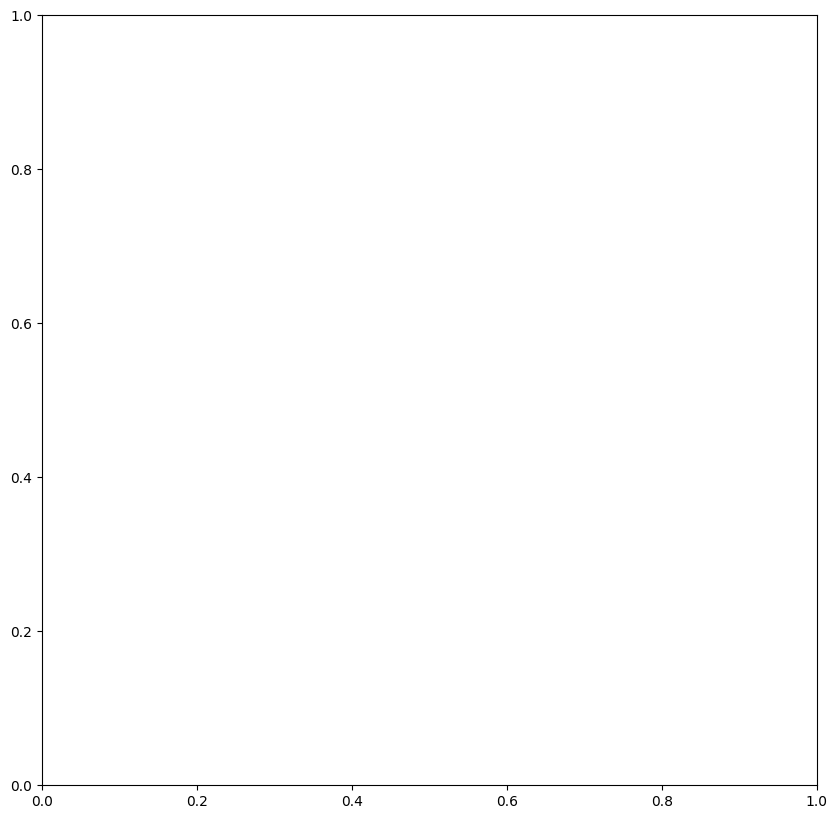

In [80]:
# feature importance
def plot_feature_importances(model, X_train):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10, 10))
    plt.barh(range(n_features), model.best_estimator_.named_steps["algo"].feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(model, X_train)

In [81]:
model.best_estimator_.named_steps["algo"].feature_importances_

array([0.00000000e+00, 7.33069915e-02, 2.61427695e-03, 1.37591880e-01,
       6.91694596e-06, 1.48892341e-06, 4.37781255e-06, 2.91091986e-05,
       1.65702545e-05, 2.66255484e-05, 5.00219896e-05, 1.59516366e-05,
       4.14069279e-05, 4.35109697e-05, 5.25247056e-06, 5.21581347e-06,
       3.30784579e-02, 1.40336194e-01, 1.29686202e-01, 6.82751188e-06,
       8.88218733e-06, 2.50713631e-05, 3.97685596e-02, 8.95001661e-06,
       4.27338554e-05, 3.51604800e-05, 1.29888339e-03, 2.34337808e-05,
       2.87891206e-05, 4.89302104e-06, 1.81685295e-05, 3.06703108e-03,
       1.16743834e-01, 8.65321969e-06, 6.64979307e-06, 1.96805372e-05,
       1.82649067e-03, 1.74497875e-05, 1.25462715e-05, 1.74974097e-05,
       3.82993449e-04, 1.91156196e-05, 6.80569572e-05, 5.35253517e-06,
       2.15129828e-05, 2.00413460e-01, 8.41156746e-06, 1.41460096e-05,
       2.02463119e-05, 1.01700701e-01, 1.19905533e-05, 1.43826807e-05,
       1.21105721e-04, 1.55727636e-02, 3.54097800e-05, 2.06879263e-05,
      

In [77]:
# feature importance
importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": model.best_estimator_.named_steps["algo"].feature_importances_
})
importance.sort_values("importance", ascending=False)

ValueError: All arrays must be of the same length

In [76]:
import time
import numpy as np

start_time = time.time()
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

AttributeError: 'RandomizedSearchCV' object has no attribute 'feature_importances_'